In [1]:
import sys
sys.path.append('D:/v1ktop/Drive/REPOS/augmentation_ap/')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
from preprocesing.load_datasets import Dataset

In [5]:
from classifier.FeactureExtraction import feature_extraction

In [6]:
data=Dataset(key="pan19en_dev", encode=False, remove_end=True)

In [7]:
original_training=data.get_dataset(folder_name="prep_chunks", truth_name="train_golden_truth.txt",
                partition="training", chunks=False)

In [8]:
cv = CountVectorizer(binary=True )

In [13]:
def get_docs_difference(augmentation_method="Xi", augmentation_test="", n_docs=[1],
                        ratios=[10], original_vocab=None, original_data=None, both=False):
    differences=[]
    for n in n_docs:
        for ratio in ratios:
            diff=[]
            diff.append(n)
            diff.append(ratio)
            prefix=augmentation_method+str(n)+str(ratio)
            folder=augmentation_method+augmentation_test+"/"+prefix
            truth_file=augmentation_method+augmentation_test+"/"+prefix+".txt"
            training_a= data.get_dataset(folder_name=folder, truth_name=truth_file, partition="augmented", chunks=False)
            if both:
                cv.fit_transform(np.append(training_a[0], original_data))
                #print(len(cv.stop_words_))
            else:
                cv.fit_transform(training_a[0])
                #print(len(cv.stop_words_))
            
            voc_aug=set(cv.vocabulary_.keys())
            voc_diff=voc_aug-original_vocab
            diff.append(len(original_vocab))
            diff.append(len(voc_aug))
            diff.append(len(voc_diff))
            differences.append(diff)
    return differences 

## Tamaño de los vocabularios segun el numero de nuevos documentos y el porcentaje modificado. Ambas clases

In [10]:
cv.fit_transform(original_training[0])
original_voc_both=set(cv.vocabulary_.keys())

### Xi

In [14]:
xi_diff=get_docs_difference(augmentation_method="Xi", n_docs=[i for i in range(1,11)],
                    ratios=[10,20,30,40,50], original_vocab=original_voc_both, both=False)

In [15]:
df = pd.DataFrame(xi_diff)
df.columns = ["n", "r", "original", "augmented", "dif"]

In [16]:
by_n_xi_diff=df.groupby("n").mean()

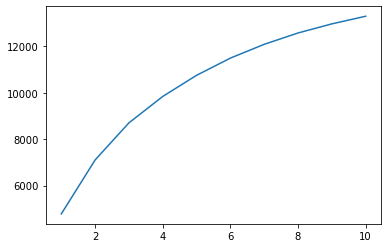

In [17]:
plt.plot(by_n_xi_diff["dif"])

In [18]:
by_r=df.groupby("r").mean()

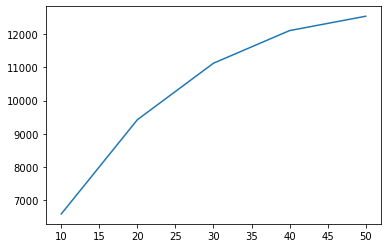

In [19]:
plt.plot(by_r["dif"])

### Random

In [21]:
rand_diff=get_docs_difference(augmentation_method="Random", n_docs=[i for i in range(1,11)],
                    ratios=[0], original_vocab=original_voc_both, both=False)

In [22]:
df_rand_diff = pd.DataFrame(rand_diff)
df_rand_diff.columns = ["n", "r", "original", "augmented", "dif"]


In [32]:
by_n_rand=df_rand_diff.groupby("n").mean()

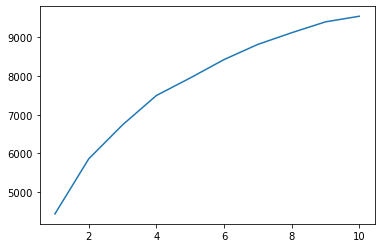

In [33]:
plt.plot(by_n_rand["dif"])

## Analogia

In [24]:
analogy_diff2=get_docs_difference(augmentation_method="Analogy", n_docs=[i for i in range(1,11)],
                    ratios=[10,20,30,40,50], original_vocab=original_voc_both, both=False)

In [25]:
df_an_diff = pd.DataFrame(analogy_diff2)
df_an_diff.columns = ["n", "r", "original", "augmented", "dif"]

In [27]:
by_n_analogy=df_an_diff.groupby("n").mean()

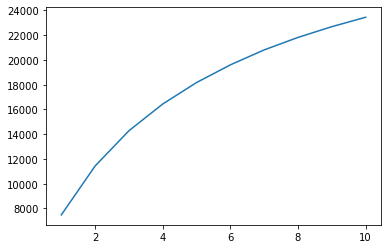

In [28]:
plt.plot(by_n_analogy["dif"])

## Resumen

In [31]:
x1=by_n_xi_diff["dif"].to_numpy()

In [34]:
x2=by_n_rand["dif"].to_numpy()

In [35]:
x3=by_n_analogy["dif"].to_numpy()

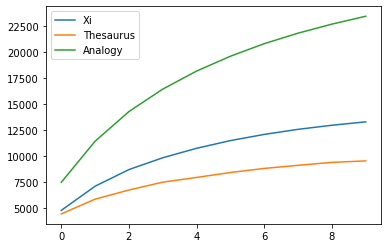

In [37]:
plt.plot(x1)
plt.plot(x2)
plt.plot(x3)
plt.legend(["Xi", "Thesaurus", "Analogy"])
plt.show()